<a href="https://colab.research.google.com/github/qweliant/GenderAndSex/blob/master/NYpcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [73]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

I have a few datasets, so i want to combine them all before exploratory visualization

In [ ]:
url_17 = "https://raw.githubusercontent.com/qweliant/PCSstudy/master/pcs2017.csv" 
url_15 = "https://raw.githubusercontent.com/qweliant/PCSstudy/master/pcs2015.csv"
url_13 = "https://raw.githubusercontent.com/qweliant/PCSstudy/master/pcs2013.csv"

pcs_2017 = pd.read_csv(url_17)
pcs_2015 = pd.read_csv(url_15)
pcs_2013 = pd.read_csv(url_13)

In [67]:
set1 = set(pcs_2017.columns)
set2 = set(pcs_2015.columns)
set3 = set(pcs_2013.columns)

names = set1.difference(set2)
diff = [name for name in names ]
diff

[]

pcs_2017 and pcs_2015 have the same columns, lets check pcs_2017 and pcs_2013

In [14]:
names = set1.difference(set3)
diff = [name for name in names ]
diff

['No Chronic Med Condition',
 'Number Of Hours Worked Each Week',
 'Pulmonary Asthma',
 'Drug Substance Disorder',
 'Three Digit Residence Zip Code',
 'Received Smoking Counseling',
 'Other Chronic Med Condition',
 'Unknown Chronic Med Condition',
 'Special Education Services',
 'Preferred Language',
 'Other Developmental Disability',
 'Received Smoking Medication',
 'Education Status']

In [94]:
names = set2.difference(set3)
diff1 = [name for name in names ]
diff1.sort()
diff1

['Drug Substance Disorder',
 'Education Status',
 'No Chronic Med Condition',
 'Number Of Hours Worked Each Week',
 'Other Chronic Med Condition',
 'Other Developmental Disability',
 'Preferred Language',
 'Pulmonary Asthma',
 'Received Smoking Counseling',
 'Received Smoking Medication',
 'Special Education Services',
 'Three Digit Residence Zip Code',
 'Unknown Chronic Med Condition']

2013 does not have any of the above columns. i will inspect and compare them to see how i may merge

In [95]:
names = set3.difference(set2)
diff2 = [name for name in names ]
diff2.sort()
diff2

['Drug Substance Related Disorder',
 'Educational Status',
 'Family Health Plus Insurance',
 'No Chronic Med. Condition',
 'Number of Hours Worked Each Week',
 'Other Developmental Disabilities',
 'Primary Language',
 'Pulmonary/Asthma',
 'Receives Smoking Counseling',
 'Receives Smoking Medication',
 'Special Educational Services',
 'Three Digit Residential Zip Code',
 'Unknown Chronic Med. Condition']

### problems..
#### 'Family Health Plus Insurance' is only in pcs 2013
#### 'Other Chronic Med Condition' is only in pcs 2015

In [66]:
pcs_2015['Other Chronic Med Condition'].value_counts()

NO         132509
YES         29390
UNKNOWN     17197
Name: Other Chronic Med Condition, dtype: int64

In [71]:
pcs_2013['Family Health Plus Insurance'].value_counts()

NO         168664
UNKNOWN      8849
YES          2691
Name: Family Health Plus Insurance, dtype: int64

In [74]:
# is there something similar to FHPI???

pcs_2015.head(1)

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Preferred Language,Veteran Status,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,Other Chronic Med Condition,No Chronic Med Condition,Unknown Chronic Med Condition,Smokes,Received Smoking Medication,Received Smoking Counseling,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Medicaid and Medicare Insurance,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2015,INPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,YES,OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,113


In [76]:
pcs_2013.head(1)

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,Primary Language,Veteran Status,Employment Status,Number of Hours Worked Each Week,Educational Status,Special Educational Services,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disabilities,Alcohol Related Disorder,Drug Substance Related Disorder,Mobility Impairment Disorder,Hearing Visual Impairment,Hyperlipidemia,High Blood Pressure,Diabetes,Obesity,Heart Attack,Stroke,Other Cardiac,Pulmonary/Asthma,Alzheimer or Dementia,Kidney Disease,Liver Disease,Endocrine Condition,Neurological Condition,Traumatic Brain Injury,Joint Disease,Cancer,No Chronic Med. Condition,Unknown Chronic Med. Condition,Smokes,Receives Smoking Medication,Receives Smoking Counseling,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Medicaid and Medicare Insurance,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Family Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residential Zip Code
0,2013,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,UNKNOWN,ENGLISH,NO,UNKNOWN EMPLOYMENT STATUS,NOT APPLICABLE,UNKNOWN,NOT APPLICABLE,YES,NO,UNKNOWN,NO,UNKNOWN,UNKNOWN,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,YES,NO,NO,NO,YES,UNKNOWN/DEFERRED,UNKNOWN/DEFERRED,UNKNOWN,UNKNOWN,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,YES,UNKNOWN,NOT APPLICABLE,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,999


## Through googling i found 
### Applications for Family Health Plus will not be accepted after December 31, 2013, because of changes under the Affordable Care Act. Starting January 1, 2014, individuals should apply for health insurance coverage through the Marketplace; https://nystateofhealth.ny.gov/

### we can surely state that no one wil have FHP in these

I should merge the 2015 and 2017 datasets, then add 'Family Health Plus Insurance' to 2015 and fill with NO, then add the column in pcs1517 to 2013. I will then format the column names in pcs2013 so there aren't NaNs on the concat

In [77]:
frames = [pcs_2015, pcs_2017]

In [78]:
pcs_1517 = pd.concat(frames, axis=0, join='outer', ignore_index=True,copy=True)

In [79]:
pcs_1517.shape

(366288, 67)

In [80]:
pcs_1517['Family Health Plus Insurance'] = 'NO'

In [81]:
pcs_2013['Other Chronic Med Condition'] = 'UNKNOWN'

In [99]:
diff1

['Drug Substance Disorder',
 'Education Status',
 'No Chronic Med Condition',
 'Number Of Hours Worked Each Week',
 'Other Chronic Med Condition',
 'Other Developmental Disability',
 'Preferred Language',
 'Pulmonary Asthma',
 'Received Smoking Counseling',
 'Received Smoking Medication',
 'Special Education Services',
 'Three Digit Residence Zip Code',
 'Unknown Chronic Med Condition']

In [ ]:
diff2

In [103]:
pcs_2013.columns = pcs_2013.columns.str.strip()
pcs_1517.columns = pcs_1517.columns.str.strip()

In [107]:
pcs_2013.columns = pcs_2013.columns.str.replace('Drug Substance Related Disorder','Drug Substance Disorder')
pcs_2013.columns = pcs_2013.columns.str.replace('Educational Status','Education Status')
pcs_2013.columns = pcs_2013.columns.str.replace('No Chronic Med. Condition', 'No Chronic Med Condition')
pcs_2013.columns = pcs_2013.columns.str.replace('Number of Hours Worked Each Week','Number Of Hours Worked Each Week')
pcs_2013.columns = pcs_2013.columns.str.replace('Other Developmental Disabilities', 'Other Developmental Disability')
pcs_2013.columns = pcs_2013.columns.str.replace('Primary Language','Preferred Language')
pcs_2013.columns = pcs_2013.columns.str.replace('Pulmonary/Asthma', 'Pulmonary Asthma')
pcs_2013.columns = pcs_2013.columns.str.replace('Receives Smoking Counseling','Received Smoking Counseling')
pcs_2013.columns = pcs_2013.columns.str.replace('Receives Smoking Medication', 'Received Smoking Medication')
pcs_2013.columns = pcs_2013.columns.str.replace('Special Educational Services', 'Special Education Services')
pcs_2013.columns = pcs_2013.columns.str.replace('Three Digit Residential Zip Code', 'Three Digit Residence Zip Code')
pcs_2013.columns = pcs_2013.columns.str.replace('Unknown Chronic Med. Condition', 'Unknown Chronic Med Condition')

In [108]:
pcs_2013.columns = pcs_2013.columns.str.lower()
pcs_1517.columns = pcs_1517.columns.str.lower()

In [109]:
frames2 = [pcs_2013, pcs_1517]

In [110]:
pcs = pd.concat(frames2, axis=0, join='outer', ignore_index=True,copy=True)

In [111]:
pcs.head()

,survey year,program category,region served,age group,sex,transgender,sexual orientation,hispanic ethnicity,race,living situation,household composition,preferred language,veteran status,employment status,number of hours worked each week,education status,special education services,mental illness,intellectual disability,autism spectrum,other developmental disability,alcohol related disorder,drug substance disorder,mobility impairment disorder,hearing visual impairment,hyperlipidemia,high blood pressure,diabetes,obesity,heart attack,stroke,other cardiac,pulmonary asthma,alzheimer or dementia,kidney disease,liver disease,endocrine condition,neurological condition,traumatic brain injury,joint disease,cancer,no chronic med condition,unknown chronic med condition,smokes,received smoking medication,received smoking counseling,serious mental illness,principal diagnosis class,additional diagnosis class,ssi cash assistance,ssdi cash assistance,veterans disability benefits,veterans cash assistance,public assistance cash program,other cash benefits,medicaid and medicare insurance,no insurance,unknown insurance coverage,medicaid insurance,medicaid managed insurance,medicare insurance,private insurance,child health plus insurance,family health plus insurance,other insurance,criminal justice status,three digit residence zip code,other chronic med condition
0,2013,SUPPORT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,UNKNOWN,ENGLISH,NO,UNKNOWN EMPLOYMENT STATUS,NOT APPLICABLE,UNKNOWN,NOT APPLICABLE,YES,NO,UNKNOWN,NO,UNKNOWN,UNKNOWN,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,YES,NO,NO,NO,YES,UNKNOWN/DEFERRED,UNKNOWN/DEFERRED,UNKNOWN,UNKNOWN,NO,NO,NO,UNKNOWN,UNKNOWN,UNKNOWN,YES,UNKNOWN,NOT APPLICABLE,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,999,UNKNOWN
1,2013,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",OTHER,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ASIAN AND PACIFIC ISLAND,NO,EMPLOYED,35 HOURS OR MORE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,YES,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN/DEFERRED,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NOT APPLICABLE,NO,YES,NO,NO,NO,NO,112,UNKNOWN
2,2013,OUTPATIENT,WESTERN REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",BLACK ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,"UNEMPLOYED, LOOKING FOR WORK",NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,UNKNOWN,NO,NO,NO,MENTAL ILLNESS,UNKNOWN/DEFERRED,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,146,UNKNOWN
3,2013,OUTPATIENT,NEW YORK CITY REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,MENTAL ILLNESS,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NOT APPLICABLE,YES,NO,NO,NO,NO,NO,103,UNKNOWN
4,2013,OUTPATIENT,CENTRAL NY REGION,CHILD,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,ENGLISH,NO,NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING ...,NOT APPLICABLE,PRE-K TO FIFTH GRADE,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN/DEFERRED,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,NO,NO,NO,YES,NO,NO,NO,137,UNKNOWN


In [114]:
pcs.columns = pcs.columns.str.replace(' ', '_')

In [115]:
pcs.isna().sum()

survey_year                         0
program_category                    0
region_served                       0
age_group                           0
sex                                 0
transgender                         0
sexual_orientation                  0
hispanic_ethnicity                  0
race                                0
living_situation                    0
household_composition               0
preferred_language                  0
veteran_status                      0
employment_status                   0
number_of_hours_worked_each_week    0
education_status                    0
special_education_services          0
mental_illness                      0
intellectual_disability             0
autism_spectrum                     0
other_developmental_disability      0
alcohol_related_disorder            0
drug_substance_disorder             0
mobility_impairment_disorder        0
hearing_visual_impairment           0
hyperlipidemia                      0
high_blood_p

In [116]:
pcs.dtypes

survey_year                          int64
program_category                    object
region_served                       object
age_group                           object
sex                                 object
transgender                         object
sexual_orientation                  object
hispanic_ethnicity                  object
race                                object
living_situation                    object
household_composition               object
preferred_language                  object
veteran_status                      object
employment_status                   object
number_of_hours_worked_each_week    object
education_status                    object
special_education_services          object
mental_illness                      object
intellectual_disability             object
autism_spectrum                     object
other_developmental_disability      object
alcohol_related_disorder            object
drug_substance_disorder             object
mobility_im

In [120]:
# save csv
pcs.to_csv("data/pcs.csv", index=False)

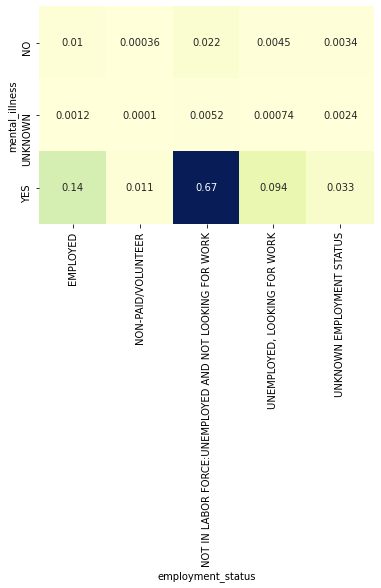

In [122]:
sns.heatmap(
    pd.crosstab(
        [pcs.mental_illness], 
        [pcs.employment_status], 
        normalize=True),
    cmap="YlGnBu", annot=True, cbar=False)